# Champion Predication Model
#By- Aarush Kumar
#Dated: September 18,2021

In [5]:
from IPython.display import Image
Image(url='https://i.pinimg.com/originals/96/f2/2d/96f22d3c7da680f8369d345f548f8837.jpg')

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('/home/aarush100616/Downloads/Projects/Predicting Champion Model/ucl_stats.csv')

In [8]:
df

year                    team  match_played  wins  draws  losts  \
0    1993               Marseille             6     3      3      0   
1    1993                   Milan             7     6      0      1   
2    1993                 Rangers             6     2      4      0   
3    1993             Club Brugge             6     2      1      3   
4    1993             CSKA Moscow             6     0      2      4   
..    ...                     ...           ...   ...    ...    ...   
709  2020  Zenit Saint Petersburg             6     2      1      3   
710  2020                Valencia             8     3      2      3   
711  2020                 Chelsea             8     3      2      3   
712  2020                    Ajax             6     3      1      2   
713  2020                   Lille             6     0      1      5   

     goals_scored  goals_conceded  gd  group_point  champions  
0              14               4  10            9          1  
1              11               2   9           12          0  
2               7               5   2            8          0  
3               5               8  -3            5          0  
4               2              11  -9            2          0  
..            ...             ...  ..          ...        ...  
709             7               9  -2            7          0  
710            13              15  -2           11          0  
711            12              16  -4           11          0  
712            12               6   6           10          0  
713             4              14 -10            1          0  

[714 rows x 11 columns]

In [9]:
df.head()

year         team  match_played  wins  draws  losts  goals_scored  \
0  1993    Marseille             6     3      3      0            14   
1  1993        Milan             7     6      0      1            11   
2  1993      Rangers             6     2      4      0             7   
3  1993  Club Brugge             6     2      1      3             5   
4  1993  CSKA Moscow             6     0      2      4             2   

   goals_conceded  gd  group_point  champions  
0               4  10            9          1  
1               2   9           12          0  
2               5   2            8          0  
3               8  -3            5          0  
4              11  -9            2          0

In [10]:
df.shape

(714, 11)

In [11]:
df.size

7854

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            714 non-null    int64 
 1   team            714 non-null    object
 2   match_played    714 non-null    int64 
 3   wins            714 non-null    int64 
 4   draws           714 non-null    int64 
 5   losts           714 non-null    int64 
 6   goals_scored    714 non-null    int64 
 7   goals_conceded  714 non-null    int64 
 8   gd              714 non-null    int64 
 9   group_point     714 non-null    int64 
 10  champions       714 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 61.5+ KB


In [13]:
df.isnull().sum()

year              0
team              0
match_played      0
wins              0
draws             0
losts             0
goals_scored      0
goals_conceded    0
gd                0
group_point       0
champions         0
dtype: int64

In [14]:
df.describe()

year  match_played        wins       draws       losts  \
count   714.000000    714.000000  714.000000  714.000000  714.000000   
mean   2008.711485      7.673669    2.939776    1.844538    2.892157   
std       7.340121      2.100880    2.316600    1.273169    1.234552   
min    1993.000000      6.000000    0.000000    0.000000    0.000000   
25%    2004.000000      6.000000    1.000000    1.000000    2.000000   
50%    2009.000000      6.000000    2.000000    2.000000    3.000000   
75%    2015.000000      8.000000    4.000000    3.000000    4.000000   
max    2020.000000     13.000000   11.000000    7.000000    6.000000   

       goals_scored  goals_conceded          gd  group_point   champions  
count    714.000000      714.000000  714.000000   714.000000  714.000000  
mean      10.582633       10.443978    0.198880     8.183473    0.039216  
std        6.979194        3.634080    7.573646     4.192922    0.194244  
min        0.000000        2.000000  -22.000000    -8.000000    0.000000  
25%        5.000000        8.000000   -5.000000     5.000000    0.000000  
50%        9.000000       10.000000    0.000000     8.000000    0.000000  
75%       14.000000       13.000000    5.000000    11.000000    0.000000  
max       43.000000       24.000000   35.000000    18.000000    1.000000

In [15]:
df.describe().T

count         mean       std     min     25%     50%     75%  \
year            714.0  2008.711485  7.340121  1993.0  2004.0  2009.0  2015.0   
match_played    714.0     7.673669  2.100880     6.0     6.0     6.0     8.0   
wins            714.0     2.939776  2.316600     0.0     1.0     2.0     4.0   
draws           714.0     1.844538  1.273169     0.0     1.0     2.0     3.0   
losts           714.0     2.892157  1.234552     0.0     2.0     3.0     4.0   
goals_scored    714.0    10.582633  6.979194     0.0     5.0     9.0    14.0   
goals_conceded  714.0    10.443978  3.634080     2.0     8.0    10.0    13.0   
gd              714.0     0.198880  7.573646   -22.0    -5.0     0.0     5.0   
group_point     714.0     8.183473  4.192922    -8.0     5.0     8.0    11.0   
champions       714.0     0.039216  0.194244     0.0     0.0     0.0     0.0   

                   max  
year            2020.0  
match_played      13.0  
wins              11.0  
draws              7.0  
losts              6.0  
goals_scored      43.0  
goals_conceded    24.0  
gd                35.0  
group_point       18.0  
champions          1.0

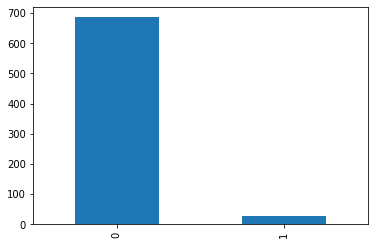

In [16]:
# number of sample in each class
df.champions.value_counts().plot(kind = 'bar');

In [17]:
df['win_match_ratio'] = (df['wins'] + 1)/ df['match_played']
df['gs_match_ratio'] = (df['goals_scored'] + 1)/ df['match_played']
df['gc_match_ratio'] = (df['goals_conceded'] + 1)/ df['match_played']
df['win_gs_ratio'] = (df['wins'] + 1)/(df['goals_scored'] + 1)
df['win_lost_ratio'] = (df['wins'] + 1)/(df['losts'] + 1)
df['gs_gc'] = (df['goals_scored'] - df['goals_conceded']) + 0.1
df['wins_draws_ratio'] = (df['wins'] +  1) / (df['draws'] + 1)
df['gs_gd'] = (df['goals_scored'] + 1) + (df['gd'])

In [18]:
df.drop(['year', 'team'], axis = 1, inplace = True)

In [19]:
x = df.drop('champions', axis = 1)
y = df['champions']

## Feature Selection

In [20]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [21]:
# mutual info regression scores
mi_score = make_mi_scores(x, y)
print(mi_score)

win_lost_ratio      0.132610
win_match_ratio     0.098559
wins                0.091779
match_played        0.090180
goals_scored        0.087571
gs_gd               0.075988
gd                  0.062063
gc_match_ratio      0.058694
group_point         0.057117
gs_gc               0.056660
draws               0.054287
goals_conceded      0.047480
wins_draws_ratio    0.035557
losts               0.028516
gs_match_ratio      0.024747
win_gs_ratio        0.000000
Name: MI Scores, dtype: float64


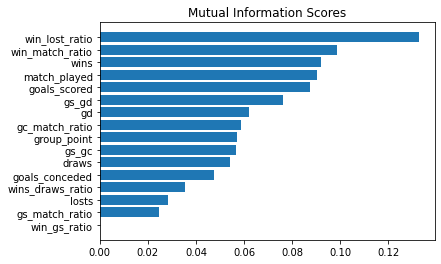

In [22]:
plot_mi_scores(mi_score)

## Balancing Imbalance Distribution Problem

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_sm, y_sm= smote.fit_resample(x, y)

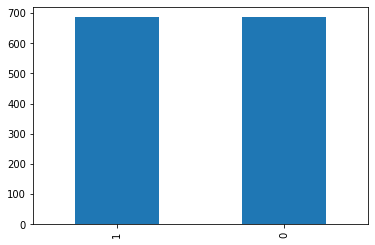

In [24]:
pd.DataFrame(y_sm).champions.value_counts().plot(kind = 'bar');

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm, y_sm,random_state = 31)

In [26]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
def report(classifier, x_test = x_test, y_test = y_test):
    print("Classification Report: \n")
    y_preds = classifier.predict(x_test)
    print(classification_report(y_test, y_preds))
    print("Confusion Matrix: \n")
    plot_confusion_matrix(classifier, x_test, y_test, cmap=plt.cm.Blues)
    print("ROC: \n")
    plot_roc_curve(classifier, x_test, y_test) 
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')

## Logistic Regression

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter = 100,
                             C = 5.428675439323859,
                             penalty='l1',
                             solver='liblinear',
                             random_state = 41).fit(x_train, y_train)

cv_lr = cross_val_score(log_clf, x_train, y_train, cv = 10)
lr_score = np.mean(cv_lr)
print("LR Score: ", lr_score)

LR Score:  0.9737768893965354


Classification Report: 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       174
           1       0.97      0.97      0.97       169

    accuracy                           0.97       343
   macro avg       0.97      0.97      0.97       343
weighted avg       0.97      0.97      0.97       343

Confusion Matrix: 

ROC: 



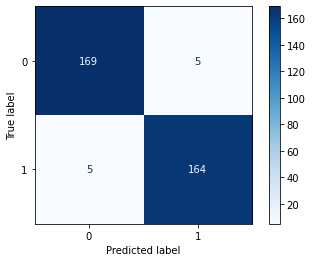

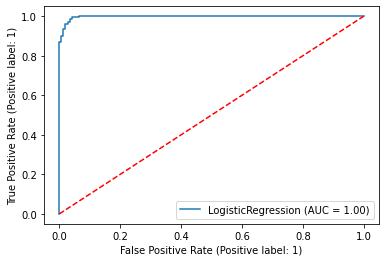

In [28]:
report(log_clf)

## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# parameter tuned by gridsearchcv
knn_clf = KNeighborsClassifier(algorithm='auto',
                                leaf_size=10,
                                n_neighbors=2,
                                p = 1).fit(x_train, y_train)

cv_knn = cross_val_score(knn_clf, x_train, y_train, cv = 10)
knn_score = np.mean(cv_knn)
print("KNN Score: ", knn_score)

KNN Score:  0.9679326099371787


Classification Report: 

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       174
           1       0.94      0.97      0.96       169

    accuracy                           0.96       343
   macro avg       0.96      0.96      0.96       343
weighted avg       0.96      0.96      0.96       343

Confusion Matrix: 

ROC: 



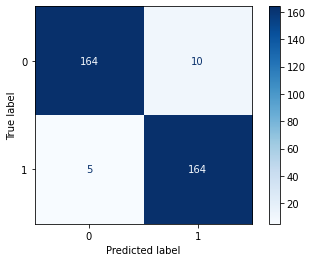

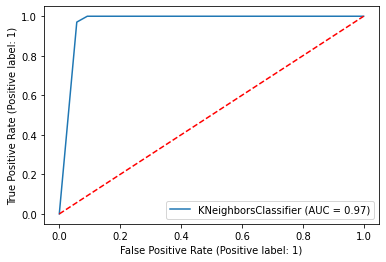

In [30]:
report(knn_clf)

## SVC

In [31]:
from sklearn import svm

# parameter tuned by gridsearchcv
svc_clf = svm.SVC(C = 233.57214690901213,
                  degree = 2,
                  kernel = 'rbf',
                  random_state = 7).fit(x_train, y_train)

cv_svc = cross_val_score(knn_clf, x_train, y_train, cv = 10)
svc_score = np.mean(cv_svc)
print("SVC Score: ", svc_score)

SVC Score:  0.9679326099371787


Classification Report: 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       174
           1       0.98      0.99      0.98       169

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343

Confusion Matrix: 

ROC: 



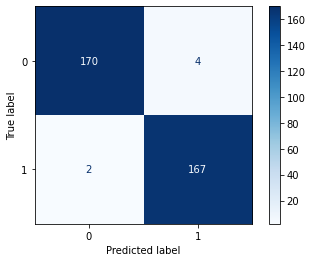

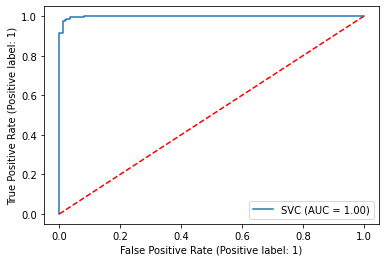

In [32]:
report(svc_clf)

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# parameters were taken by randomizedsearchcv
rand_clf = RandomForestClassifier(n_estimators=1000,
                                 min_samples_split = 4,
                                 min_samples_leaf = 1,
                                 max_depth = None,
                                 random_state = 35).fit(x_train, y_train)

cv_rf = cross_val_score(rand_clf, x_train, y_train, cv = 10)
rf_score = np.mean(cv_rf)
print("RF Score: ", rf_score)

RF Score:  0.9766799923853036


Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       174
           1       0.95      0.98      0.97       169

    accuracy                           0.97       343
   macro avg       0.97      0.97      0.97       343
weighted avg       0.97      0.97      0.97       343

Confusion Matrix: 

ROC: 



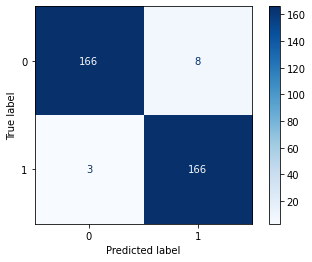

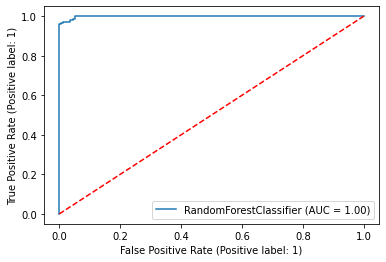

In [34]:
report(rand_clf)

## Gradient Boost

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(learning_rate=0.1,
                                 loss='deviance',
                                 max_depth=2,
                                 min_samples_leaf=5,
                                 min_samples_split=2,
                                 n_estimators=500,
                                 random_state=31).fit(x_train, y_train)

cv_gbc = cross_val_score(gbc_clf, x_train, y_train, cv = 10)
gbc_score = np.mean(cv_gbc)
print("GBC Score: ", gbc_score)

GBC Score:  0.9854273748334286


Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       174
           1       0.96      0.98      0.97       169

    accuracy                           0.97       343
   macro avg       0.97      0.97      0.97       343
weighted avg       0.97      0.97      0.97       343

Confusion Matrix: 

ROC: 



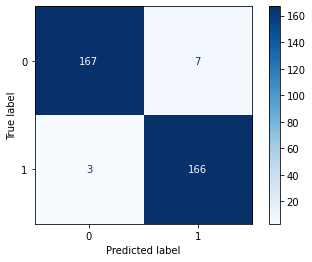

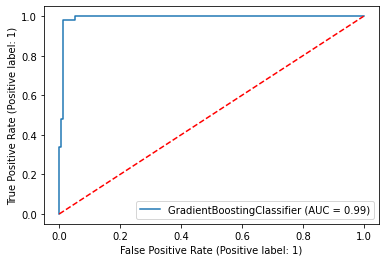

In [36]:
report(gbc_clf)

## LightBGM

In [37]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier().fit(x_train, y_train)
cv_lgbm = cross_val_score(lgbm, x_train, y_train, cv = 10)
lgbm_score = np.mean(cv_lgbm)
print("Lgbm Score: ", lgbm_score)

Lgbm Score:  0.9844374643061109


Classification Report: 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       174
           1       0.97      0.99      0.98       169

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343

Confusion Matrix: 

ROC: 



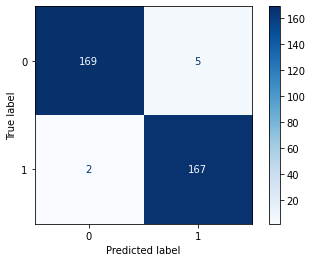

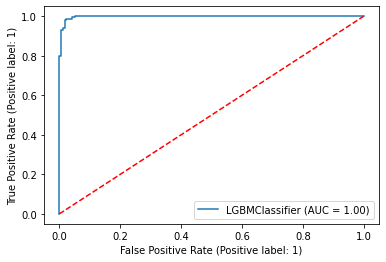

In [38]:
report(lgbm)

## Score Analysis

In [39]:
score_dict= {'Logistic Regression':lr_score,
             'KNN':knn_score,
             'SVC':svc_score,
             'Random Forest': rf_score,
             'Gradient Boost':gbc_score,
             'LightBGM':lgbm_score}
pd.DataFrame.from_dict(score_dict, orient = 'index', columns = ['Score'])

Score
Logistic Regression  0.973777
KNN                  0.967933
SVC                  0.967933
Random Forest        0.976680
Gradient Boost       0.985427
LightBGM             0.984437